# Using Word Embedding

# LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER

In [3]:
from tensorflow.keras.layers import Embedding #Applying embedding layer
embedding_layer = Embedding(1000, 64)
#The Embedding layer takes at least two arguments: the number of possible tokens(here,1000:1+ maximum word index) & the dimensionality of the embeddings and the d

In [5]:
from tensorflow.keras.datasets import imdb #downloading imdb dataset
from tensorflow.keras import preprocessing
max_features = 10000 #Number of words to consider as features
maxlen = 20 #Cuts off the text after this number of words (among the max_features most common words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) #Loads the data as lists of integers
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) #Turns the lists of integers into a 2D integer tensor 
                                                                        #of shape (samples, maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 25s 1us/step


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) #Specifies the maximum input length to the Embedding layer so you can later 
                                                    #flatten the embedded inputs. After the Embedding layer embedded inputs. 
                                                    #the activations have shape (samples, maxlen,8)
model.add(Flatten()) #Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples,maxlen * 8)
model.add(Dense(1, activation='sigmoid')) #Adds the classifier on top
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 220us/sample - loss: 0.6749 - acc: 0.6103 - val_loss: 0.6310 - val_acc: 0.6890
Epoch 2/10
20000/20000 [==============================] - 2s 89us/sample - loss: 0.5487 - acc: 0.7503 - val_loss: 0.5293 - val_acc: 0.7248
Epoch 3/10
20000/20000 [==============================

In [9]:
from tensorflow.keras.layers import Embedding #Applying embedding layer

In [10]:
from tensorflow.keras.datasets import imdb #downloading imdb dataset
from tensorflow.keras import preprocessing
max_features = 10000 #Number of words to consider as features
maxlen = 100 #Cuts off the text after this number of words (among the max_features most common words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) #Loads the data as lists of integers
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) #Turns the lists of integers into a 2D integer tensor 
                                                                        #of shape (samples, maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) #Specifies the maximum input length to the Embedding layer so you can later 
                                                    #flatten the embedded inputs. After the Embedding layer embedded inputs. 
                                                    #the activations have shape (samples, maxlen,8)
model.add(Flatten()) #Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples,maxlen * 8)
model.add(Dense(1, activation='sigmoid')) #Adds the classifier on top
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 164us/sample - loss: 0.6016 - acc: 0.6970 - val_loss: 0.4438 - val_acc: 0.8168
Epoch 2/10
20000/20000 [==============================] - 2s 117us/sample - loss: 0.3557 - acc: 0.8550 - val_loss: 0.3531 - val_acc: 0.8438
Epoch 3/10
20000/20000 [===========================

In [ ]:
You can increase batch size, epochs, validation to improve more accuracy

# USING PRETRAINED WORD EMBEDDINGS

In [16]:
import os
imdb_dir = 'D:/RNN/aclImdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100 #Cuts off reviews after 100 words
training_samples = 200 #Trains on 200 samples
validation_samples = 10000 #Validates on 10,000 samples
max_words = 10000 #Considers only the top 10,000 words in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0]) #Splits the data into a training set and a validation set,but first shuffles the data,because
                                #you’re starting with data in which samples are ordered (all negative first,then all positive)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [22]:
glove_dir = 'D:/RNN/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [24]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector #Words not found in the embedding index will be all zeros.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.layers[0].set_weights([embedding_matrix]) #Layer 0 pr embedding matrix dalna hai
model.layers[0].trainable = False

In [28]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [29]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 16s 78ms/sample - loss: 2.4921 - acc: 0.5050 - val_loss: 0.8317 - val_acc: 0.4959
Epoch 2/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.5640 - acc: 0.7550 - val_loss: 2.2565 - val_acc: 0.5046
Epoch 3/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.6517 - acc: 0.7050 - val_loss: 1.3385 - val_acc: 0.4956
Epoch 4/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.3372 - acc: 0.8750 - val_loss: 1.2553 - val_acc: 0.4963
Epoch 5/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.3205 - acc: 0.7950 - val_loss: 0.9652 - val_acc: 0.5183
Epoch 6/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.1213 - acc: 0.9800 - val_loss: 0.8084 - val_acc: 0.5413
Epoch 7/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.1014 - acc: 0.9750 - val_loss: 2.2055 - val_acc: 0.4955
Epoch 8/10
2

In [30]:
model.save_weights('pre_trained_glove_model.h5')

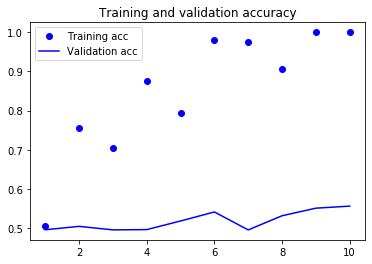

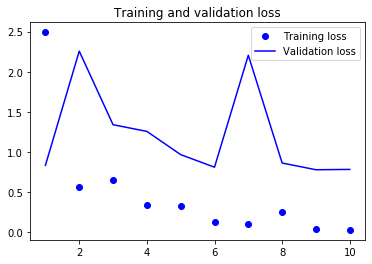

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [34]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 12ms/sample - loss: 0.6966 - acc: 0.5050 - val_loss: 0.6922 - val_acc: 0.5168
Epoch 2/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.5101 - acc: 0.9500 - val_loss: 0.6948 - val_acc: 0.5118
Epoch 3/10
200/200 [==============================] - 2s 8ms/sample - loss: 0.2975 - acc: 0.9700 - val_loss: 0.7010 - val_acc: 0.5107
Epoch 4/10
200/200 [==============================] - 2s 8ms/sample - loss: 0.1402 - acc: 1.0000 - val_loss: 0.7122 - val_acc: 0.5178
Epoch 5/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.0665 - acc: 1.0000 - val_loss: 0.7057 - val_acc: 0.5208
Epoch 6/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.0351 - acc: 1.0000 - val_loss: 0.7164 - val_acc: 0.5162
Epoch 7/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.0200 - acc: 1.0000 - val_loss: 0.7198 - val_acc: 0.5197
Epoch 8/10
20

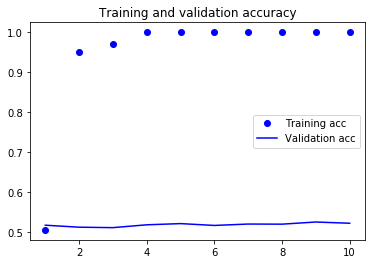

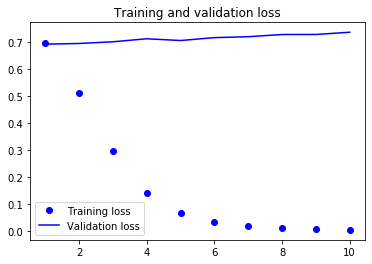

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [42]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 103us/sample - loss: 0.7801 - acc: 0.5488


[0.7800973596000671, 0.54884]